In [1]:
import pandas as pd

# Create a sample DataFrame
df = pd.read_csv('data/export_train_dataframe.csv', index_col=0)
display(df.shape)
df.head()

(59849, 8)

,Plant,Healthy,Illness,Image_name,Image_width,Image_height,Image_format,Image_mode
0,Apple,0,scab,image (1).JPG,256,256,JPEG,RGB
1,Apple,0,scab,image (10).JPG,256,256,JPEG,RGB
2,Apple,0,scab,image (100).JPG,256,256,JPEG,RGB
3,Apple,0,scab,image (101).JPG,256,256,JPEG,RGB
4,Apple,0,scab,image (102).JPG,256,256,JPEG,RGB


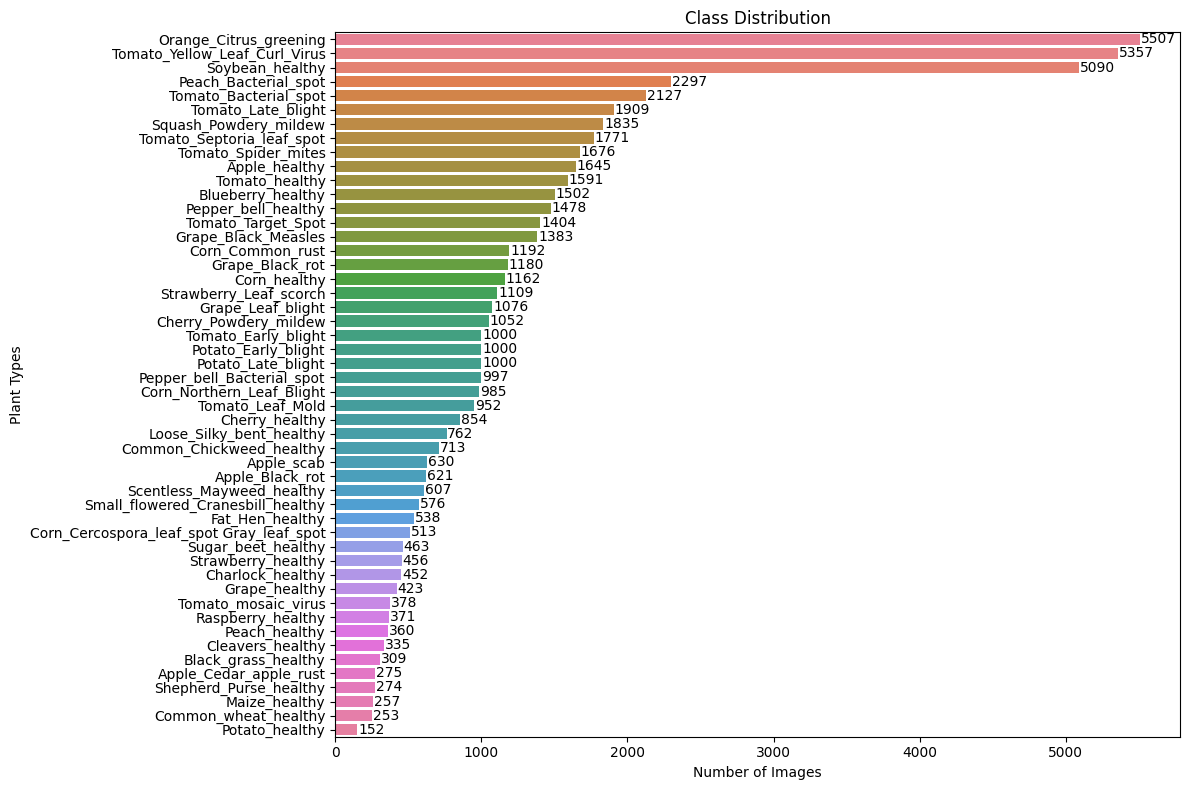

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Plant' and 'Illness' and count the occurrences
class_counts = df.groupby(['Plant', 'Illness']).size().reset_index(name='Count')
# Concatenate Plant and Illness to form a single class column
class_counts['Class'] = class_counts['Plant'] + '_' + class_counts['Illness']
# Sort the class_counts DataFrame by the 'Count' column in descending order
class_counts = class_counts.sort_values(by='Count', ascending=False)
# Define a list of colors for the bars
colors = sns.color_palette("husl", len(class_counts))

# Visualize class distribution using a horizontal bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=class_counts.Count, y=class_counts.Class, orient='h', palette=colors, legend=False, hue=class_counts.Class)
plt.title('Class Distribution')
plt.xlabel('Number of Images')
plt.ylabel('Plant Types')
plt.tight_layout()  # Adjust the layout to prevent overlapping labels

# Add data labels to each bar
for i, v in enumerate(class_counts['Count']):
    ax.text(v + 5, i, str(v), color='black', va='center')

plt.show()

In [3]:
import plotly.express as px

# Assuming df is your DataFrame
# Group by 'Plant' and 'Illness' and count the occurrences
class_counts = df.groupby(['Plant', 'Illness']).size().reset_index(name='Count')
# Concatenate Plant and Illness to form a single class column
class_counts['Class'] = class_counts['Plant'] + '_' + class_counts['Illness']

# Create a horizontal bar plot using Plotly
fig = px.bar(class_counts, 
             x='Count',
             y='Class',
             orientation='h',
             color='Class',
             title='Class Distribution',
             labels={'Count': 'Number of Images', 'Class': 'Plant Types'},
             text='Count')

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Number of Images',
    yaxis_title='Plant Types',
    yaxis=dict(categoryorder='total ascending'),  # Ensure the bars are sorted
    showlegend=False,
    margin=dict(l=100, r=20, t=50, b=50)  # Adjust margins to prevent label cutoff
)

# Show the plot
fig.show()

In [18]:
# Group by Image_width, Image_height, and Image_format and count the occurrences
image_counts = df.groupby(['Image_width', 'Image_height', 'Image_format']).size().reset_index(name='Count')
# Concatenate Image_width, Image_height, and Image_format to form a single class column
image_counts['Image'] = image_counts['Image_width'].astype(str) + 'x' + image_counts['Image_height'].astype(str) + '.' + image_counts['Image_format']
image_counts = image_counts.drop(['Image_width', 'Image_height', 'Image_format'], axis=1)
# Sort the class_counts DataFrame by the 'Count' column in descending order
image_counts = image_counts.sort_values(by='Count', ascending=False)
image_counts

,Count,Image
206,54309,256x256.JPEG
65,34,115x115.PNG
87,29,137x137.PNG
105,27,155x155.PNG
71,26,121x121.PNG
...,...,...
561,1,605x605.PNG
816,1,960x960.PNG
817,1,961x961.PNG
818,1,962x962.PNG


In [23]:
image_mode_counts = df.groupby(['Plant', 'Illness', 'Image_mode']).size().reset_index(name='Count')
image_mode_counts['Class'] = image_mode_counts['Plant'] + '_' + image_mode_counts['Illness']
image_mode_counts = image_mode_counts.drop(['Plant', 'Illness'], axis=1)
image_mode_counts

,Image_mode,Count,Class
0,RGB,621,Apple_Black_rot
1,RGB,275,Apple_Cedar_apple_rust
2,RGB,1645,Apple_healthy
3,RGB,630,Apple_scab
4,RGB,306,Black_grass_healthy
5,RGBA,3,Black_grass_healthy
6,RGB,1502,Blueberry_healthy
7,RGB,452,Charlock_healthy
8,RGB,1052,Cherry_Powdery_mildew
9,RGB,854,Cherry_healthy
